In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

# --------------------
# Problem 0
# ----------------------

### Make a library (or to be more precise a "module") called optimization.py that contains the gradient descent algorithm and the Newton algorithm for minimization. You will use these to algorithms at various places in this hwk. These two algorithms should return all the iterates so that we can do some plotting. Note that your library will use numpy and linalg. So at the begining of the file it should be written: 
import numpy as np

from scipy import linalg

### The import statement below should work:

In [2]:
import optimization

### and then you should be able to minimize function by doing call such as 
iterates = optimization.grad_desc(gradf,alpha,x0,num_iter)
### or
iterates = optimization.newton(gradf,Hf,x0,num_iter)

# ---------------------------------------------------------
# Problem 1
# -----------------------------------------------------------

### Consider  the quadratic
### $$ f(x_1,x_2) = x_1^2 + 10 x_2^2
$$


### a) Plot this function with meshgrid and contour.

In [3]:
def f_for_plot(x1,x2):
    c = 10
    z = x1**2 + c*x2**2
    return z

In [4]:
x1 = np.linspace(-1,1,20)
x2 = np.linspace(-1,1,20)
X1,X2 = np.meshgrid(x1,x2)

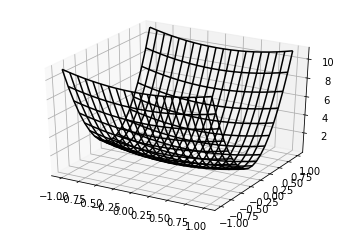

In [5]:
Z = f_for_plot(X1,X2)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, Z, color = 'black')
plt.show()

In [6]:
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
X1,X2 = np.meshgrid(x1,x2)

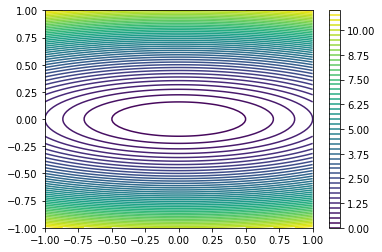

In [7]:
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,50)
plt.colorbar()
plt.show()

### b) Recall that the successive iterates of a gradient descent algorithm are computed according to:
### $$
\bf x^{(k+1)}= x^{(k)} - \alpha \nabla f(x^{(k)})
$$
### Find a formula for ${\bf x}^{(k)} = (x_1^{(k)},x_2^{(k)})$. This is a PEN AND PAPER question! You should find a formula that depends on $\alpha$. The trick is that the equations for $x^{(k)}_1$ and $x_2^{(k)}$ decouple (that is to compute $x^{(k+1)}_1$ you just need to know $x^{(k)}_1$, you do not need $x^{(k)}_2$ , so essentially you are doing two 1D problems)

### c) What is the minimum of $f(x_1,x_2)$? How small should be the step size $\alpha$ to guaranty convergence toward the minimum? How small should it be to guaranty convergence with no oscilattion (that is, both the $x_1$ and $x_2$ variables do not oscillate)? Complete the following:
* If $\alpha$ is smaller than ?? then the iterates converges toward the global minimum without oscillation.
* If $\alpha$ is between ?? and ?? then the iterates converges toward the global minimum but they oscillate.
* If $\alpha$ is greater than ?? then the iterates do not converge.

### d) Implement gradient descent and plot the iterates on the contour line of the function. Use plot(x,y,'-ro') to connect the successive iterates so that you can see wether it oscillate or not. 

In [8]:
def gradf(x):
    g = np.array([2*x[0] , 20*x[1]])
    return g

In [9]:
x0 = np.array([0.5,0.5])
alpha = 1/25
num_iter=50
iterates = optimization.grad_desc(gradf,alpha,x0,num_iter)

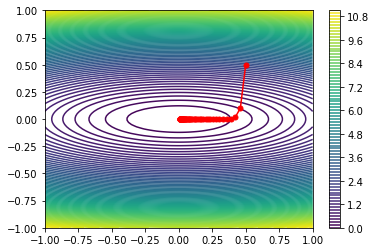

In [10]:
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.plot(iterates[:,0],iterates[:,1],'r-o', markersize=5)
plt.colorbar()
plt.show()

### e) Choose $\alpha = 1/25$. How many iterations are needed to be within $10^{-5}$ of the true minimum? Start with the initiall guess $\bf x^{(0)} = (0.5,0.5)$
### In other words, you want to find the smallest $k$ such that
### $$
\|\bf x^{(k)} - \bf x^*\| < 10^{-3}
$$
### where $\bf x^*$ denote minimum of the function. Recall that the norm of a vector is defined by
### $$
\| \bf v \| = \sqrt{v_1^2 +v_2^2}
$$
### so
$$ \|\bf x^{(k)} - \bf x^*\| = \sqrt{(x_1^{(k)}-x^*_1)^2 + (x_2^{(k)}-x^*_2)^2 } $$
### Feel free to  use linalg.norm(). Here is an example:

In [11]:
v = np.array( [3,4])
print( (v[0]**2 + v[1]**2)**0.5  )
print( linalg.norm(v) )

5.0
5.0


### You could add this new algorithm in the library, but it is actually easier to directly write it in the notebook.

In [12]:
xstar = np.array([0.,0.])
x = np.array([0.5,0.5])
alpha = 1/25
for i in range(1,100):
    x = x -alpha*gradf(x)
    print('iteration', i, '\t error=', linalg.norm(x-xstar))

iteration 1 	 error= 0.4707440918375928
iteration 2 	 error= 0.4236723262144933
iteration 3 	 error= 0.38936454684010463
iteration 4 	 error= 0.35819737336333224
iteration 5 	 error= 0.3295408004419302
iteration 6 	 error= 0.30317750236077967
iteration 7 	 error= 0.2789233006916652
iteration 8 	 error= 0.2566094365719732
iteration 9 	 error= 0.23608068164341717
iteration 10 	 error= 0.21719422711182212
iteration 11 	 error= 0.19981868894287105
iteration 12 	 error= 0.18383319382744115
iteration 13 	 error= 0.16912653832124586
iteration 14 	 error= 0.15559641525554618
iteration 15 	 error= 0.1431487020351025
iteration 16 	 error= 0.1316968058722943
iteration 17 	 error= 0.12116106140251075
iteration 18 	 error= 0.11146817649030989
iteration 19 	 error= 0.1025507223710851
iteration 20 	 error= 0.0943466645813983
iteration 21 	 error= 0.08679893141488644
iteration 22 	 error= 0.07985501690169552
iteration 23 	 error= 0.07346661554955988
iteration 24 	 error= 0.06758928630559509
iteration 

It took 75 iterations. Note that doing a while loop would be better:

In [13]:
xstar = np.array([0.,0.])
x = np.array([0.5,0.5])
alpha = 1/25
TOL = 0.001
i=0
error = 100000
while error > TOL:
    i = i+1
    x = x - alpha*gradf(x)
    error = linalg.norm(x-xstar)
    print('iteration', i, '\t error=', error)

iteration 1 	 error= 0.4707440918375928
iteration 2 	 error= 0.4236723262144933
iteration 3 	 error= 0.38936454684010463
iteration 4 	 error= 0.35819737336333224
iteration 5 	 error= 0.3295408004419302
iteration 6 	 error= 0.30317750236077967
iteration 7 	 error= 0.2789233006916652
iteration 8 	 error= 0.2566094365719732
iteration 9 	 error= 0.23608068164341717
iteration 10 	 error= 0.21719422711182212
iteration 11 	 error= 0.19981868894287105
iteration 12 	 error= 0.18383319382744115
iteration 13 	 error= 0.16912653832124586
iteration 14 	 error= 0.15559641525554618
iteration 15 	 error= 0.1431487020351025
iteration 16 	 error= 0.1316968058722943
iteration 17 	 error= 0.12116106140251075
iteration 18 	 error= 0.11146817649030989
iteration 19 	 error= 0.1025507223710851
iteration 20 	 error= 0.0943466645813983
iteration 21 	 error= 0.08679893141488644
iteration 22 	 error= 0.07985501690169552
iteration 23 	 error= 0.07346661554955988
iteration 24 	 error= 0.06758928630559509
iteration 

### f) How many step would be required with Newton method to reach the same accuracy? 

ANS: only one step is necessary to exactly find the monimum?

# -----------------------------------------------------------------
# PROBLEM 2
# -------------------------------------------------------------------

### Consider the function
### $$
f(x,y)= (1+y^2) e^{-x}
$$
### and do a gradient descent with step size $\alpha = 0.5$ and starting with initial guess $(x^{(0)},y^{(0)}) = (1,1)$. 

### a)  Plot the first 20 iterates on the contour lines of the functions. Use the window $0<x<3$ and $-3 <y< 3 $.

In [14]:
def f_for_plot(x1,x2):
    z = (1+x2**2)*np.exp(-x1)
    return z

In [15]:
x1 = np.linspace(-1,1,20)
x2 = np.linspace(-1,1,20)
X1,X2 = np.meshgrid(x1,x2)

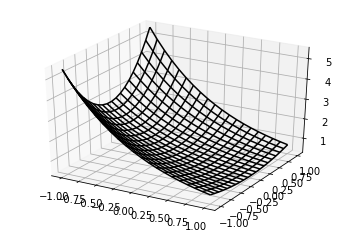

In [16]:
Z = f_for_plot(X1,X2)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, Z, color = 'black')
plt.show()

In [17]:
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
X1,X2 = np.meshgrid(x1,x2)

In [18]:
def gradf(x):
    dfdx = - (1+x[1]**2)*np.exp(-x[0])
    dfdy = 2*x[1]*np.exp(-x[0])
    g = np.array([dfdx,dfdy])
    return g

In [19]:
x0 = np.array([1,1])
alpha = 0.5
num_iter=20
iterates = optimization.grad_desc(gradf,alpha,x0,num_iter)

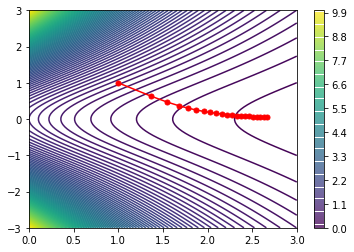

In [20]:
x1 = np.linspace(0,3,100)
x2 = np.linspace(-3,3,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.plot(iterates[:,0],iterates[:,1],'r-o', markersize=5)
plt.colorbar()
plt.show()

### b) Lets denote by ${\bf x}^{(k)}=(x^{(k)},y^{(k)})$ the $k^{th}$ iterate. Find $\bf x^{(10)}$,  $\bf x^{(100)}$, $\bf x^{(1000)}$, $\bf x^{(10,000)}$ and $\bf x^{(100,000)}$. Use the same $\alpha$ and same $\bf x^{(0)}$ as in part a). What is happening? Any guess on where is the global minimum? Look at carefully the formula for $f(x,y)$ and try to explain the behavior of the gradient descent algorithm

In [21]:
x0 = np.array([1,1])
alpha = 0.5
num_iter=100001
iterates = optimization.grad_desc(gradf,alpha,x0,num_iter)

In [22]:
print(iterates[10])
print(iterates[100])
print(iterates[1000])
print(iterates[10000])
print(iterates[100000])

[2.21934777 0.1228534 ]
[4.00183505e+00 3.18418865e-03]
[6.22506346e+00 3.67098449e-05]
[8.51835821e+00 3.73317604e-07]
[1.08199064e+01 3.74025381e-09]


# -------------------------------------------------------------------------
# PROBLEM 3
# -----------------------------------------------------------------------

### Now let add $x^2$ to the function from the previous problem:
### $$
f(x,y)= (1+y^2) e^{-x} + x^2
$$
### and do a gradient descent with step size $\alpha = 0.5$ and starting with initial guess $(x^{(0)},y^{(0)}) = (1,1)$. 

### a) Plot this function with wire_frame and contour() on the window $-3<x<3$ and $-3<y<3$. Does it seem to have a minumum? Where (roughly)? Explain why adding $x^2$ fixed the problem the we had in the previous question. (I am not looking for a rigorous explanation here, just some hand waving justification will do).

In [23]:
def f_for_plot(x1,x2):
    z = (1+x2**2)*np.exp(-x1) + x1**2
    return z

In [24]:
x1 = np.linspace(-1,1,20)
x2 = np.linspace(-1,1,20)
X1,X2 = np.meshgrid(x1,x2)

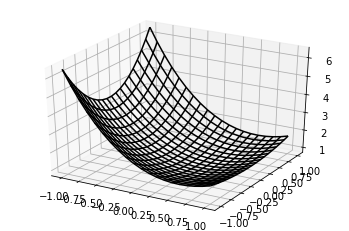

In [25]:
Z = f_for_plot(X1,X2)
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, X2, Z, color = 'black')
plt.show()

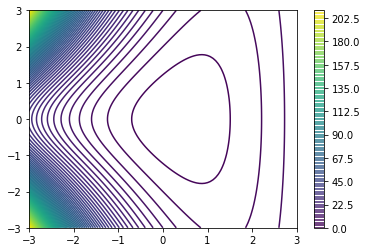

In [26]:
x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.colorbar()
plt.show()

### b) Do a gradient descent with $\alpha=0.1$ and initial guess (-2,2). Plot the first 50 iterates on the contour line of the function. What is $\bf x^{(50)}$? What are the x and y coordinate of the minimum?

In [27]:
def gradf(x):
    dfdx = - (1+x[1]**2)*np.exp(-x[0]) + 2* x[0]
    dfdy = 2*x[1]*np.exp(-x[0])
    g = np.array([dfdx,dfdy])
    return g

In [28]:
x0 = np.array([-2,2])
alpha = 0.1
num_iter=50
iterates = optimization.grad_desc(gradf,alpha,x0,num_iter)

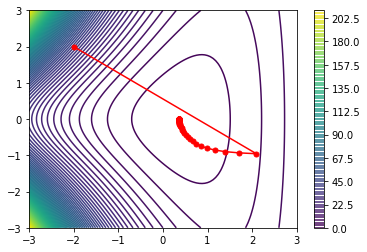

In [29]:
x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.plot(iterates[:,0],iterates[:,1],'r-o', markersize=5)
plt.colorbar()
plt.show()

In [30]:
iterates[-1]

array([ 0.35173953, -0.00132318])

### c) Do Newton's method starting with initial guess $(-2,2)$ Is it working? Then do it with initial guess $(-1.2,2)$ Plot the first 10 iterates on the contour lines.

In [31]:
def Hf(x):
    dxdx = (1+x[1]**2)*np.exp(-x[0]) + 2
    dxdy = -2*x[1]*np.exp(-x[0]) 
    dydy = 2*np.exp(-x[0])
    hessian =  np.array( [ [dxdx,dxdy],[dxdy,dydy] ] )
    return hessian

In [32]:
x0 = np.array([-1.2,1])
num_iter = 10
iterates = optimization.newton(gradf,Hf,x0,num_iter)

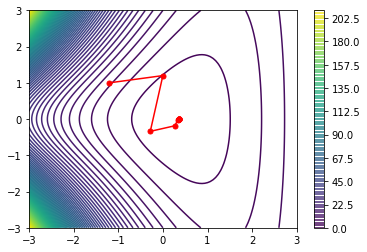

In [33]:
x1 = np.linspace(-3,3,100)
x2 = np.linspace(-3,3,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.plot(iterates[:,0],iterates[:,1],'r-o', markersize=5)
plt.colorbar()
plt.show()

### d) display the x and y values of the first 10 iterates of Newton's method whn starting with $(-1.2,1)$ Do you see how fast it converges to the solution? 

In [34]:
iterates

array([[-1.20000000e+00,  1.00000000e+00],
       [ 4.44089210e-16,  1.20000000e+00],
       [-2.82051282e-01, -3.38461538e-01],
       [ 2.65549759e-01, -1.85341891e-01],
       [ 3.41940479e-01, -1.41584004e-02],
       [ 3.51669154e-01, -1.37742486e-04],
       [ 3.51733706e-01, -8.89148296e-09],
       [ 3.51733711e-01, -4.87173713e-17],
       [ 3.51733711e-01,  6.16297582e-33],
       [ 3.51733711e-01,  0.00000000e+00],
       [ 3.51733711e-01,  0.00000000e+00]])

### e) Go back to the library and add a gradient descent algorithm and a Newton algorithm in which, intead of prescribing a number of iteration, you prescribe a tolereance TOL. These two algorithms will stop when two successive iterates are within some tolerance of oneanother:
$$
\| \bf x^{(k)} - \bf x^{(k-1)} \| \le \text{TOL}
$$
### These two algorithms should return the last iterate and print the total number of iterations that were done. Do not store the successive iterates. You should use a while loop and the linalg.norm() function. 

### These two algorithms should be called as follow:
iterates = optimization.grad_desc2(gradf,alpha,x0,TOL)
### or
iterates = optimization.newton2(gradf,Hf,x0,TOL)
### How many iterations are needed to reach a tolerance of $10^{-6}$ with Newton's method when starting with initial guess (-1.2,1)? How many iterations are needed to reach a tolerance of $10^{-6}$ with a gradient descent with stepsize $\alpha=0.1$ when starting with initial guess (-1.2,1)? 

In [35]:
x0 = np.array([-1.2,1])
TOL = 10**(-6)
xmin = optimization.newton2(gradf,Hf,x0,TOL)
print(xmin)

number of iteration needed to reach desired tolerance:  7
[ 3.51733711e-01 -4.87173713e-17]


In [36]:
alpha = 0.1
xmin = optimization.grad_desc2(gradf,alpha,x0,TOL)
print(xmin)

number of iteration needed to reach desired tolerance:  71
[3.51733711e-01 5.25839906e-06]


# ------------------------------------------------------
# Problem 4
# ------------------------------------------------------

### Consider the function
### $$
f(x,y) = x^2 + 2xy +4y^2 - 2x - \log(1-x)
$$
### Note that their is a logarithmic barrier at $x = 1$: this means that the function is equal to $+\infty$ when $x=1$.

### a) Plot this function with wire_frame and contour() on the window $-0.99<x<0.99$ and $-1<y<1$. Does it seem to have a minumum? Where (roughly)? 

In [37]:
def f_for_plot(x,y):
    z = x**2 + 2*x*y + 4*y**2 - 2*x -np.log(1-x)
    return z

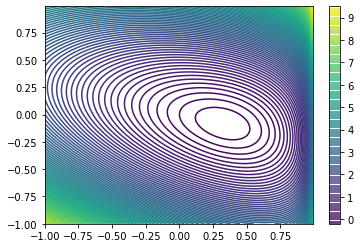

In [38]:
x1 = np.linspace(-1,0.99,100)
x2 = np.linspace(-1,0.99,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.colorbar()
plt.show()

### b) Do a gradient descent with $\alpha=0.1$ and initial guess (-0.5,-0.5). Plot the first 50 iterates on the contour line of the function. What is $\bf x^{(50)}$? What are the x and y coordinate of the minimum?

In [39]:
def gradf(x):
    dfdx = 2*x[0] + 2*x[1] - 2 + 1/(1-x[0])
    dfdy = 2*x[0] + 8*x[1]
    g = np.array([dfdx , dfdy])
    return g

In [40]:
x0 = np.array([-0.5,-0.5])
alpha = 0.1
num_iter=50
iterates = optimization.grad_desc(gradf,alpha,x0,num_iter)

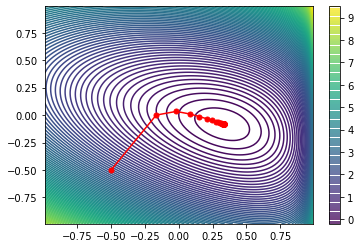

In [41]:
x1 = np.linspace(-0.99,0.99,100)
x2 = np.linspace(-0.99,0.99,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.plot(iterates[:,0],iterates[:,1],'r-o', markersize=5)
plt.colorbar()
plt.show()

In [42]:
iterates[-1]

array([ 0.33333333, -0.08333333])

### c) Do Newton's method starting with initial guess $(-0.5,-0.5)$. Plot the first 10 iterates on the contour lines.

In [43]:
def Hf(x):
    dxdx = 2 + 1/(1-x[0])**2
    dxdy = 2
    dydy = 8
    hessian =  np.array( [ [dxdx,dxdy],[dxdy,dydy] ] )
    return hessian

In [44]:
x0 = np.array([-0.2,-0.2])
alpha = 0.1
num_iter=5
iterates = optimization.newton(gradf,Hf,x0,num_iter)

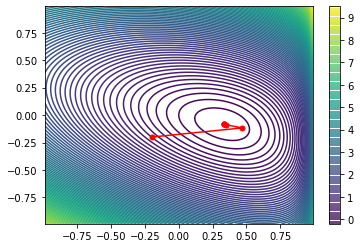

In [45]:
x1 = np.linspace(-0.99,0.99,100)
x2 = np.linspace(-0.99,0.99,100)
X1,X2 = np.meshgrid(x1,x2)
Z = f_for_plot(X1,X2)
plt.contour(X1, X2, Z,100)
plt.plot(iterates[:,0],iterates[:,1],'r-o', markersize=5)
plt.colorbar()
plt.show()

In [46]:
iterates[-1]

array([ 0.33333333, -0.08333333])

### d) How many iterations are needed to reach a tolerance of $10^{-6}$ with Newton's method when starting with initial guess $(-0.5,-0.5)$? How many iterations are needed to reach a tolerance of $10^{-6}$ with a gradient descent with stepsize $\alpha=0.1$ when starting with initial guess $(-0.5,-0.5)$? 

In [47]:
x0 = np.array([-0.5,-0.5])
TOL = 10**(-6)
xmin = optimization.newton2(gradf,Hf,x0,TOL)
print(xmin)

number of iteration needed to reach desired tolerance:  6
[ 0.33333333 -0.08333333]


In [48]:
alpha = 0.1
xmin = optimization.grad_desc2(gradf,alpha,x0,TOL)
print(xmin)

number of iteration needed to reach desired tolerance:  33
[ 0.33333196 -0.08333274]


# --------------------------------
# Problem 5
# ---------------------------------

### Consider doing a gradient descent on the parabola  $f(x) = x^2$. Use pen and paper to find a formula for the $k^{th}$ iterate $x^{(k)}$, starting with $x^{(0)}=1$. How small should be $\alpha$ so that the iterates converges toward the minimum.

# ------------------------------
# Problem 6 
# --------------------------------

### Find the maximum of $f(x)  = e^{-x^2} - (x-1)^2$ with a grdient ascent. Give your result with 5 digits accuracy.

In [49]:
def f(x):
    y =  np.exp(-x**2) - (x-1)**2
    return y

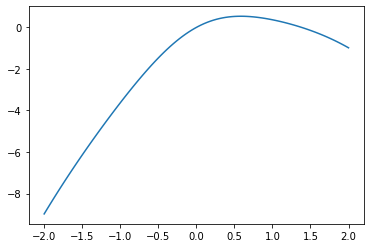

In [50]:
x = np.linspace(-2,2,100)
plt.plot(x, f(x))
plt.show()

In [51]:
def fprime(x):
    df = - 2*(x-1) - 2*x * np.exp(-x**2) 
    return df

In [52]:
x = 0.0
alpha = 0.1
for i in range(0,100):
    x = x + alpha* fprime(x)
    print(x)

0.2
0.3215684224339071
0.39925919390159265
0.45132180541194816
0.4874275336648144
0.5130718398203453
0.5315926517619427
0.5451282117623585
0.555105065502222
0.5625045644801508
0.5680175326878301
0.5721387660828037
0.575227297866312
0.5775462113318003
0.5792897075567582
0.5806019384488725
0.5815903538755344
0.5823352992737729
0.5828969958934503
0.5833206624075207
0.5836402984357605
0.5838814942098789
0.5840635253975237
0.584200919721755
0.584304631279888
0.5843829223492277
0.5844420264267066
0.5844866472802047
0.5845203348580842
0.5845457686063857
0.5845649710941232
0.5845794691431808
0.5845904153932131
0.58459868003395
0.5846049200358467
0.584609631404297
0.5846131886235093
0.584615874432383
0.5846179023031312
0.5846194334115996
0.5846205894494145
0.5846214622970098
0.5846221213267654
0.5846226189169411
0.5846229946147816
0.5846232782797445
0.5846234924567134
0.5846236541678369
0.5846237762654185
0.5846238684533905
0.5846239380585583
0.5846239906129151
0.5846240302933094
0.584624060253